In [214]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib.ticker as mticker
from os import listdir
import pandas as pd

def load_cell_data(file_path):
    data = loadmat(file_path, squeeze_me=True, struct_as_record=False)["Dataset"]
    return data.__dict__  # Return dataset as dict

In [215]:
def adv_state(path): 
    data = load_cell_data(path)
    data["status"] = np.where(data["Line"] <= 13, "Repouso", "")
    data["status"] = np.where((data["Line"] > 13) & (data["Line"] < 15), "Descarga CC", data["status"])
    data["status"] = np.where((data["Line"] > 14) & (data["Line"] < 16), "Repouso", data["status"])
    data["status"] = np.where((data["Line"] > 15) & (data["Line"] < 17), "Carga CC", data["status"])
    data["status"] = np.where((data["Line"] > 16) & (data["Line"] < 19), "Carga CV", data["status"])
    data["status"] = np.where((data["Line"] > 19) & (data["Line"] < 21), "Descarga CC", data["status"])
    data["status"] = np.where((data["Line"] > 20) & (data["Line"] < 22), "Descarga CV", data["status"])
    data["status"] = np.where((data["Line"] > 21) & (data["Line"] < 24), "Carga CC", data["status"])
    data["status"] = np.where((data["Line"] > 23) & (data["Line"] < 26), "Carga CV", data["status"])
    data["status"] = np.where((data["Line"] > 26) & (data["Line"] < 28), "Descarga CC", data["status"])
    data["status"] = np.where((data["Line"] > 27) & (data["Line"] < 33), "Descarga CV", data["status"])
    data["status"] = np.where((data["Line"] > 32) & (data["Line"] < 35), "Carga CC", data["status"])
    data["status"] = np.where((data["Line"] > 34), "Pulsos de corrente", data["status"])    
    return data

In [216]:
def plot_adv_state(data):
    tempos_transicoes = []

    colunas = ["Time", "Line", "I", "U", "status"]
    data = pd.DataFrame(data, columns=colunas)

    data["Change"] = data["Line"].diff().fillna(0)
    transicoes = data[data["Change"] != 0]
    tempos_transicoes = transicoes["Time"].tolist()
    print(tempos_transicoes[9:])

    plt.figure(figsize=(12, 6))
    plt.scatter(transicoes["Time"], transicoes["I"],
                color="red", marker="o", s=60, label="state changes")

    plt.plot(data["Time"], data["I"], label="I")
    plt.plot(data["Time"], data["U"], label="U")
    plt.plot(data["Time"], data["status"], label="status")

    plt.legend()
    plt.show()

[3.0581e-06, 3.30492e-05, 3.00009947, 3.4313844365, 5.4314500362, 6.2582200136, 6.5771653574, 6.5939273606, 7.4983055763, 7.7048289364, 7.7215615724, 8.5691673176, 8.8849552802, 8.9017213011, 9.8067930247, 10.0057775113, 10.0057778337, 10.005778111, 10.0057783887, 10.005812167, 10.1058784125, 19.245724792, 19.3811036962, 19.8812030725, 19.8862487968, 19.9696480962, 20.0064214437, 20.0092651287, 20.4692309188, 20.9693301119, 20.974375341, 21.0577749023, 21.0628261351, 21.0656689229, 21.3416642156, 21.8417570727, 21.8467911877, 21.930188796, 21.935228421, 21.9380702291, 22.2140581876]


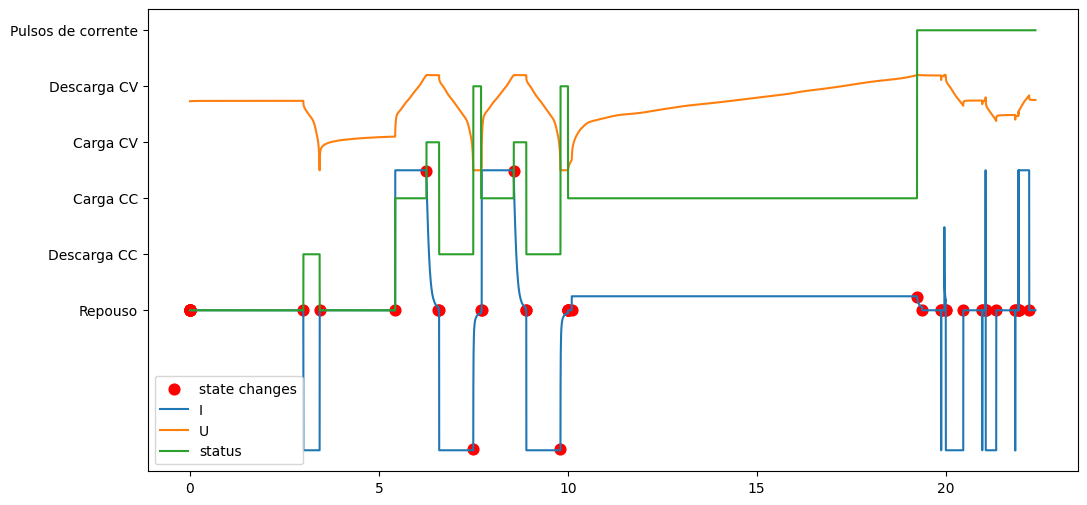

In [217]:
data = adv_state("CU_Dynamic/CU005/BW-VTC-447_7686_CU_cyc_005_BW-VTC-AgeVal.mat")
plot_adv_state(data)

[21.8417570727, 21.8467911877, 21.930188796, 21.935228421, 21.9380702291, 22.2140581876]


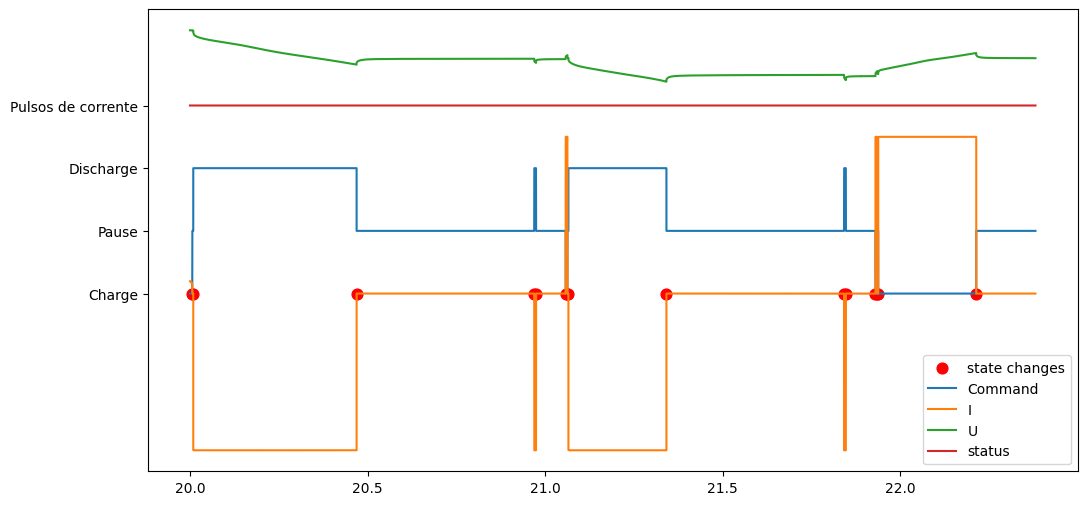

In [212]:
data = adv_state("CU_Dynamic/CU005/BW-VTC-447_7686_CU_cyc_005_BW-VTC-AgeVal.mat")

colunas = ["Time", "Line", "Command", "I", "U", "status"]
data = pd.DataFrame(data, columns=colunas)

data = data[data["Time"] >= 20] # Apenas pulsos de corrente

data["Change"] = data["Line"].diff().fillna(0)
transicoes = data[data["Change"] != 0]

tempos_transicoes = transicoes["Time"].tolist()
print(tempos_transicoes[9:])

plt.figure(figsize=(12, 6))
plt.scatter(transicoes["Time"], transicoes["I"],
            color="red", marker="o", s=60, label="state changes")

plt.plot(data["Time"], data["Command"], label="Command")
plt.plot(data["Time"], data["I"], label="I")
plt.plot(data["Time"], data["U"], label="U")
plt.plot(data["Time"], data["status"], label="status")

plt.legend()
plt.show()


[]


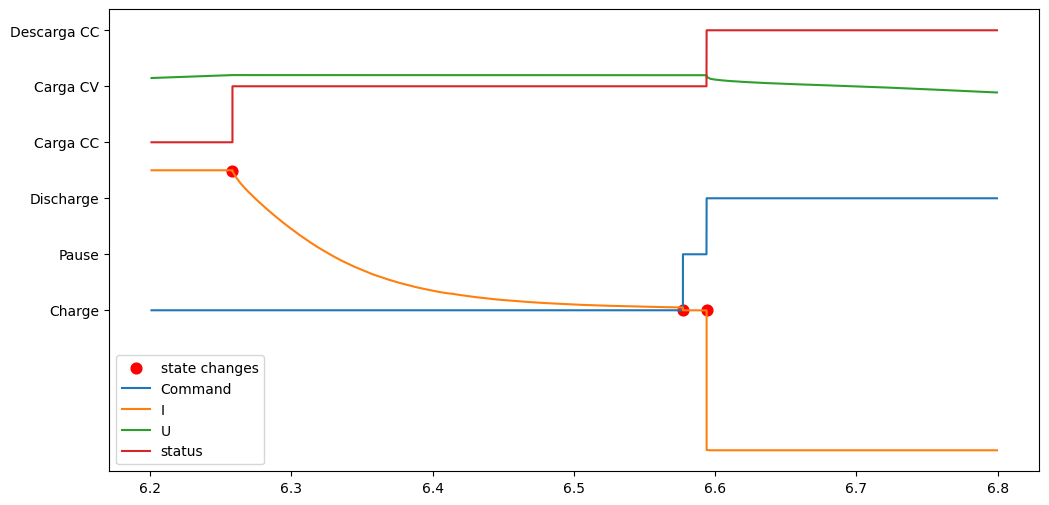

In [213]:
data = adv_state("CU_Dynamic/CU005/BW-VTC-447_7686_CU_cyc_005_BW-VTC-AgeVal.mat")

colunas = ["Time", "Line", "Command", "I", "U", "status"]
data = pd.DataFrame(data, columns=colunas)

data = data[(data["Time"] >= 6.2) & (data["Time"] <= 6.8)] # Apenas pulsos de corrente

data["Change"] = data["Line"].diff().fillna(0)
transicoes = data[data["Change"] != 0]

tempos_transicoes = transicoes["Time"].tolist()
print(tempos_transicoes[9:])

plt.figure(figsize=(12, 6))
plt.scatter(transicoes["Time"], transicoes["I"],
            color="red", marker="o", s=60, label="state changes")

plt.plot(data["Time"], data["Command"], label="Command")
plt.plot(data["Time"], data["I"], label="I")
plt.plot(data["Time"], data["U"], label="U")
plt.plot(data["Time"], data["status"], label="status")

plt.legend()
plt.show()